In [13]:
import pandas as pd
import numpy as numpy
import matplotlib as plt
import sqlite3
import zipfile
%matplotlib inline

In [14]:
# Load datasets
with zipfile.ZipFile('./Dataset/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('Dataset')

In [15]:

# Read the CSV file
bom_movie = pd.read_csv('./Dataset/bom.movie_gross.csv.gz')

# Display the first few rows
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [30]:
bom_movieClean = bom_movie.drop(columns = ['studio','domestic_gross',])
bom_movieClean.head()

,title,foreign_gross,year
0,Toy Story 3,652000000,2010
1,Alice in Wonderland (2010),691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,664300000,2010
3,Inception,535700000,2010
4,Shrek Forever After,513900000,2010


In [17]:
conn = sqlite3.connect('./Dataset/im.db')
query = """SELECT * FROM sqlite_master"""
pd.read_sql(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [18]:
query2 = """SELECT * FROM   MOVIE_RATINGS"""
ratings= pd.read_sql(query2, conn)
ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [28]:
ratings_Clean = ratings.drop(columns = ['numvotes'])
ratings_Clean.head(2)

,movie_id,averagerating
0,tt10356526,8.3
1,tt10384606,8.9


In [19]:
query3 = """SELECT * FROM movie_basics"""
movieBasics = pd.read_sql(query3, conn)
movieBasics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [24]:
movieBasics_Clean = movieBasics.drop(columns = ['runtime_minutes', 'original_title'])
movieBasics_Clean.head(2)

,movie_id,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"


In [29]:
imbData = pd.merge(ratings_Clean, movieBasics_Clean, left_on = 'movie_id', right_on = 'movie_id')
imbData.head()

,movie_id,averagerating,primary_title,start_year,genres
0,tt10356526,8.3,Laiye Je Yaarian,2019,Romance
1,tt10384606,8.9,Borderless,2019,Documentary
2,tt1042974,6.4,Just Inès,2010,Drama
3,tt1043726,4.2,The Legend of Hercules,2014,"Action,Adventure,Fantasy"
4,tt1060240,6.5,Até Onde?,2011,"Mystery,Thriller"


In [31]:
imbData.rename(columns = {'primary_title': 'title'}, inplace = True)

In [32]:
Database = pd.merge(imbData, bom_movieClean, left_on = 'title', right_on = 'title')
Database .head()

,movie_id,averagerating,title,start_year,genres,foreign_gross,year
0,tt1043726,4.2,The Legend of Hercules,2014,"Action,Adventure,Fantasy",42400000,2014
1,tt1171222,5.1,Baggage Claim,2013,Comedy,887000,2013
2,tt1181840,7.0,Jack and the Cuckoo-Clock Heart,2013,"Adventure,Animation,Drama",3400000,2014
3,tt1210166,7.6,Moneyball,2011,"Biography,Drama,Sport",34600000,2011
4,tt1212419,6.5,Hereafter,2010,"Drama,Fantasy,Romance",72500000,2010


In [34]:
Database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       3027 non-null   object 
 1   averagerating  3027 non-null   float64
 2   title          3027 non-null   object 
 3   start_year     3027 non-null   int64  
 4   genres         3020 non-null   object 
 5   foreign_gross  1832 non-null   object 
 6   year           3027 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 165.7+ KB


In [35]:
Database.describe()

,averagerating,start_year,year
count,3027.000000,3027.000000,3027.000000
mean,6.457582,2013.783284,2014.077635
std,1.012277,2.466955,2.442245
min,1.600000,2010.000000,2010.000000
25%,5.900000,2012.000000,2012.000000
50%,6.600000,2014.000000,2014.000000
75%,7.100000,2016.000000,2016.000000
max,9.200000,2019.000000,2018.000000


In [41]:
# Divide the 'foreign_gross' column by a million
Database['foreign_gross'] = Database['foreign_gross'] / 1_000_000

In [46]:
# Convert 'foreign_gross' to numeric, coercing errors to NaN
Database['foreign_gross'] = pd.to_numeric(Database['foreign_gross'], errors='coerce')

# Filter the DataFrame
movieRating = Database[(Database['averagerating'] >= 7) &
                      (Database['foreign_gross'] >= 27.9) &
                      (Database['start_year'] > 2012)]

# Continue with the rest of your analysis
movieRating = movieRating.assign(genres=movieRating['genres'].str.split(',')).explode('genres')


AttributeError: module 'matplotlib' has no attribute 'xlabel'

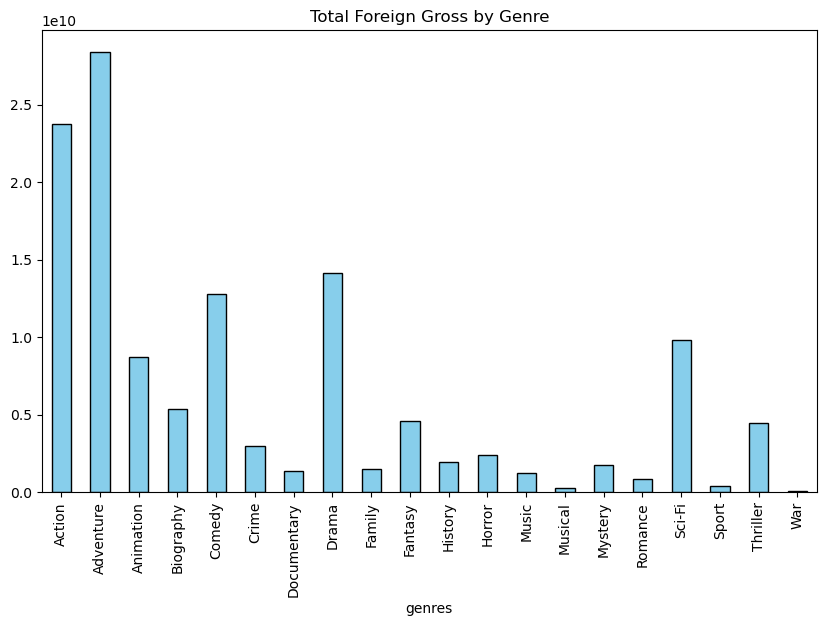

In [45]:


# Group by 'genres' and sum the 'foreign_gross' for each genre
genre_gross = movieRating.groupby('genres')['foreign_gross'].sum()

# Plot a bar graph
genre_gross.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.pyplot.title('Total Foreign Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Foreign Gross (in millions)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()